### 타이타닉 생존자 예측 문제 데이터의 전처리 실습

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns # matplotlib을 이용해서 시각화 함수를 제공

In [3]:
## 데이터 읽어오기
data = pd.read_csv("../data/titanic.csv")
print(data.shape)
data.head(1)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


- Survived - 생존여부(타겟변수 y): 0 = No, 1 = Yes : 목적변수
- Pclass - 티켓 등급: 1 = 1st, 2 = 2nd, 3 = 3rd 
- Sex - 성별: male, female
- Age - 나이    
- SibSp - 동승한 형제, 배우자
- Parch - 부모와 자녀의 수
- Ticke - 티켓번호
- Fare - 승선요금
- Cabin - 객실번호
- Embarked - 승선한 항구 :  C, Q, S

In [5]:
## 사본 사용
df = data.copy()

### 데이터 전처리 종류(전처리의 필수)
- 데이터 클리닝 - (결측치, 틀린값처리)
- 스케일링 - 여러변수의 값의 범위를 동등한 조건으로 맞추는 것 : 표준스케일링, min-max 스케일링
- 이상치 처리 -이상치 탐지 및 제거/대체 
- 데이터변환 - 로그변환,카테고리인코딩

### 데이터 기본 정보 확인
- info 를 사용
- 컬럼명, 컬럼수,샘플수를 파악한다
- 카테고리형 타입과 숫자형 타입(int,float)
    - 숫자형도 연속적인 값인 아날로그 데이터인지 카테고리형 데이터인지 확인

In [6]:
df.info()
## 891개의 sample 중 개수가 다른  변수가 존재 - 결측치가 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
## 수치형 데이터의 기본 통계값 보기 - object가 아닌 것들
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

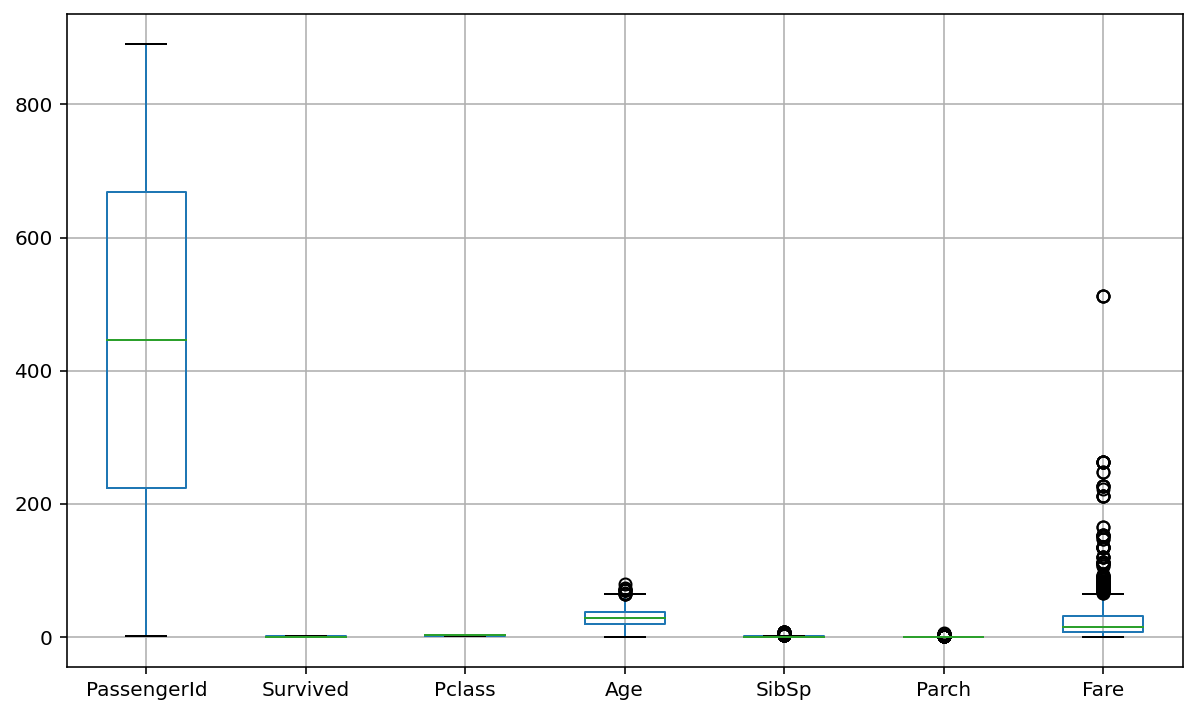

In [8]:
## 박스 플롯으로 데이터의 전체적인 값의 범위를 파악
plt.figure(figsize=(10,6))
df.boxplot()

In [9]:
# 컬럼명 보기 - 복사해서 쓰려고
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:>

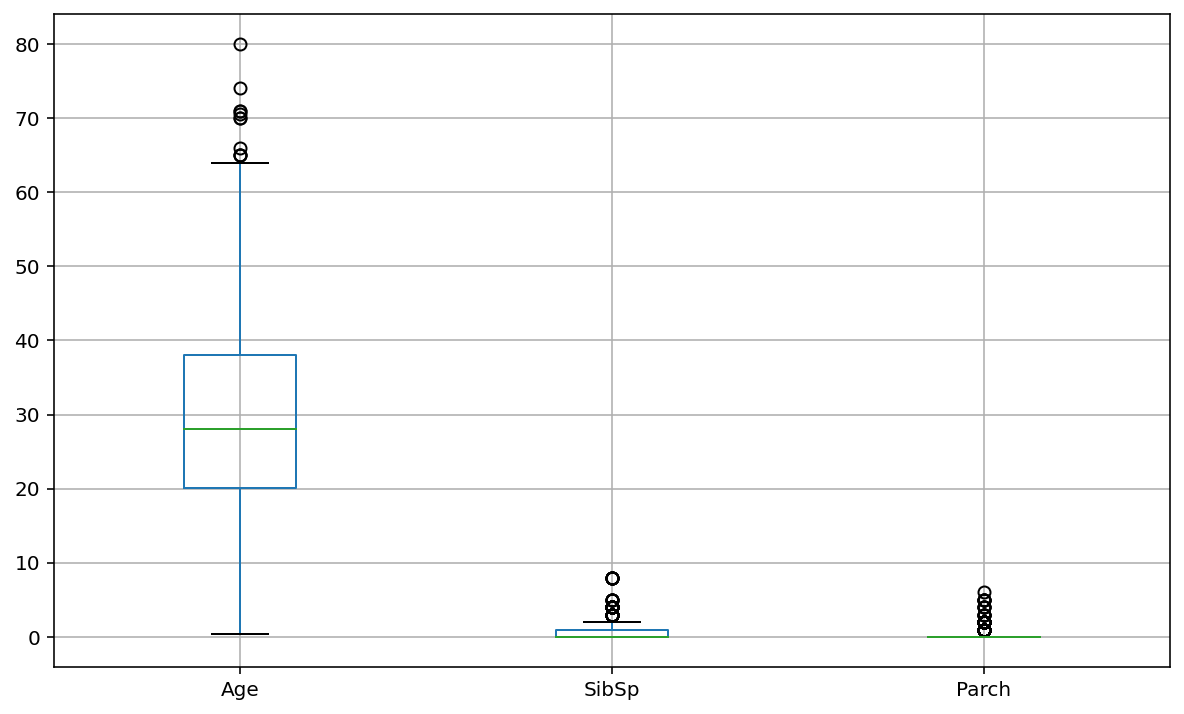

In [10]:
# 특정 컬럼만 보기
plt.figure(figsize=(10,6))
df[['Age','SibSp','Parch']].boxplot()

<AxesSubplot:>

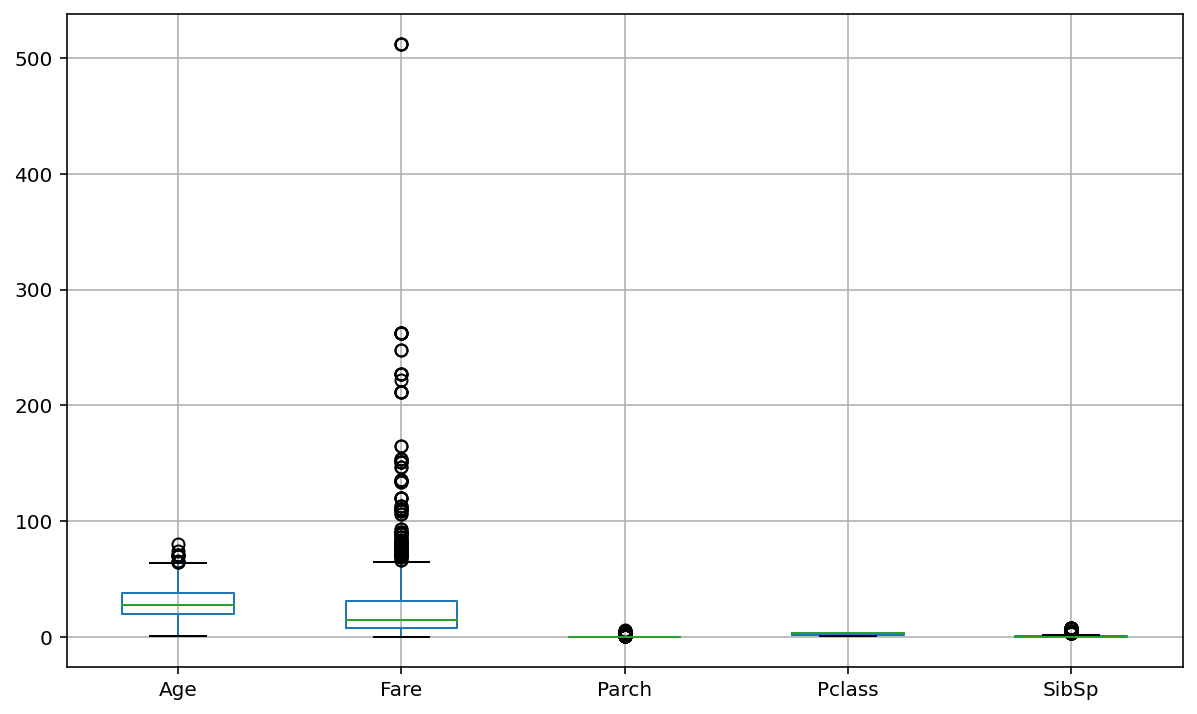

In [12]:
## 특정 칼럼만 제외하고 보기
plt.figure(figsize=(10,6))
df[df.columns.difference(['PassengerId','Survived'])].boxplot()

## 결측치 처리
- 특정 컬럼에 결측치가 너무 많은 경우 컬럼 자체를 사용하지 않는 경우도 있음

In [13]:
# 컬럼별 결측치 개수
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
## Embarked(승선항) : 결측치가 2개고 대체하기 어려우므로 샘플 삭제
df.shape

(891, 12)

In [15]:
df = df[~df['Embarked'].isnull()] #null이 아닌 행만 추출
df.shape

(889, 12)

### 컬럼 미사용

In [ ]:
## Cabin은 객실명  결측치가 687개고 종류도 다양(146개)하니까 사용하지 않는다
## 이름도 의미없음(이름으로 생존여부 예측 불가능)

In [18]:
print('Cabin 결측치 수 :', df.Cabin.isnull().sum())
print('Cabin 종류 : ',len(df.Cabin.value_counts()))

Cabin 결측치 수 : 687
Cabin 종류 :  146


In [ ]:
## Age는 결측치  : 177, 생존에 영향을 미치는 의미 있는 정보로 판된되므로 다른 값으로 대체

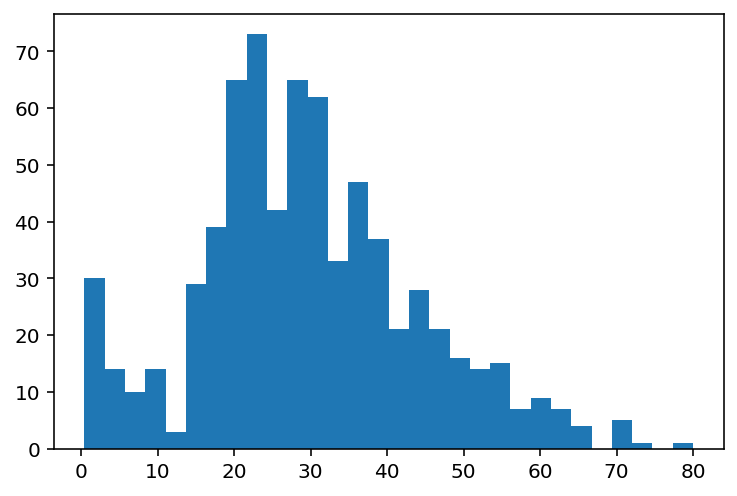

In [19]:
## 나이 데이터 분포 확인
plt.hist(df.Age, bins=30)
plt.show()

In [20]:
## 나이 평균
df.Age.mean()

29.64209269662921

In [21]:
## 결측치플 평균 나이로 대체
df.Age.fillna(df.Age.mean(),inplace=True)
df.Age.isnull().sum()

0

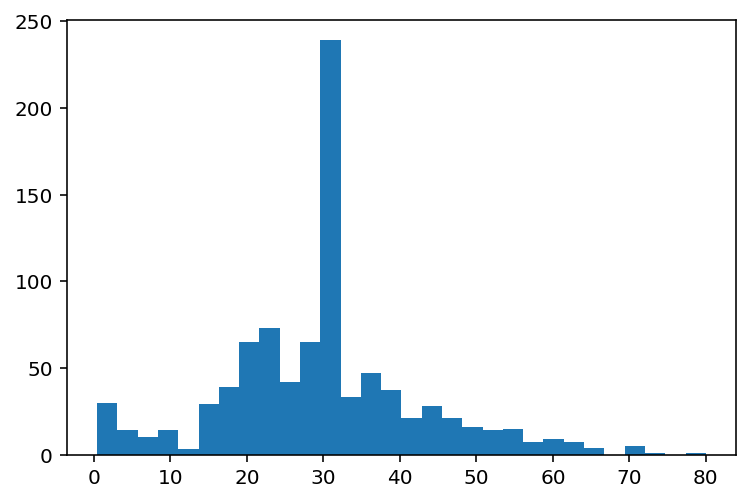

In [22]:
## 나이 데이터 분포 확인
plt.hist(df.Age, bins=30)
plt.show()

In [ ]:
## 데이터 변환
- 카테고리 변수와 수치형 변수로 나누어서 처리한다
- 카테고리 변수는 일반적으로 원핫인코딩으로 표현
- 수치형의 아나로그 변수는 로그변환이 역수변환등을 하거나 카테고리 변수인 경우 
    카테고리 변환 후 원핫인코딩을 진행하기도 한다

In [ ]:
## 카테고리 변수
- 선실등급
    - 3가지 등급
    - 원핫 인코딩으로 변환


In [23]:
# 선실 등급 비율
df.Pclass.value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [25]:
# 원핫 인코딩으로 변환
df_class = pd.get_dummies(df["Pclass"],prefix='Class')
df_class.head()

,Class_1,Class_2,Class_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [ ]:
- 성별
    - 원핫 인코딩으로 변환

In [26]:
# 성별의 구성
df.Sex.value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [27]:
# 원핫인코딩 변환
df_sex = pd.get_dummies(df['Sex'],prefix='Sex')
df_sex.head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [ ]:
### 항구명
- 세가지 값으로 이루어져 있음

In [28]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [29]:
# 원핫 인코딩으로 변경
df_embarked = pd.get_dummies(df['Embarked'],prefix='Embarked')
df_embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [30]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [31]:
### 티켓명 - 680 종류나되기 때문에 분석에 큰의미가 없는것으로 보임 - 사용하지 않는다
len(df['Ticket'].value_counts())

680

In [ ]:
#### 아나로그 변수
- 요금

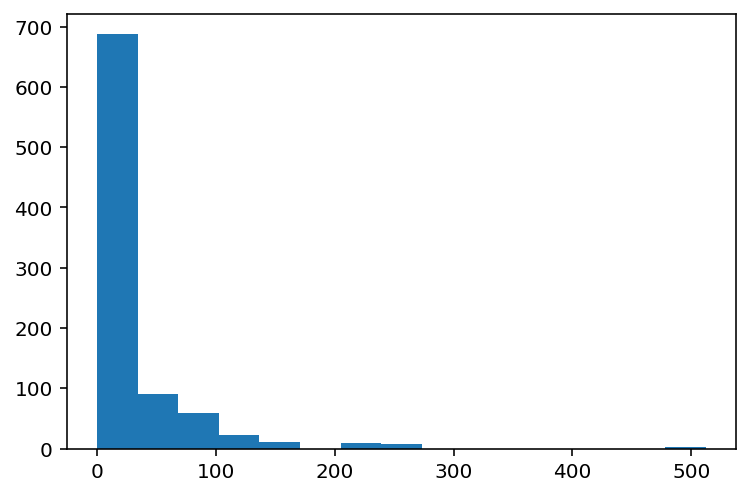

In [32]:
plt.hist(df.Fare, bins=15)
plt.show()

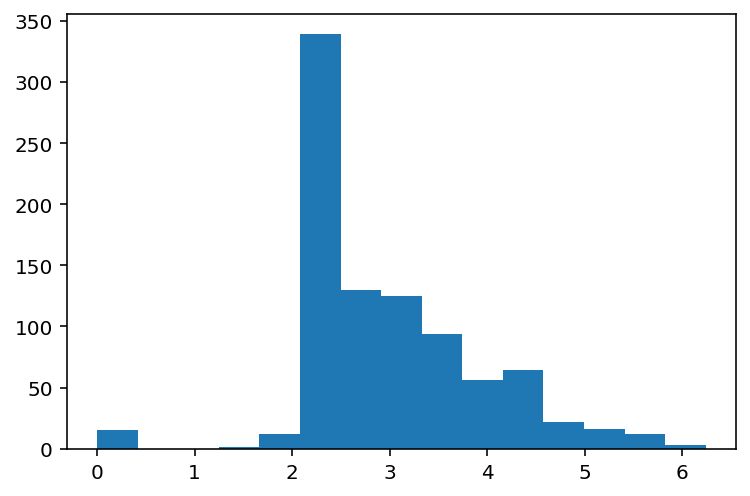

In [33]:
##  돈과 관련된 데이터는 로그 변환을 하여 선형적인 값으로 변환시키는 경우가 많다
##  로그를 취하면 정규분포 처럼 보인다(log-normal 분포)
##  fare 변수의  min 값이 0원 이었음 - 무한대로 오류가 남
## +1을 해서 무임 승선인 경우 1달러 치환
plt.hist(np.log(df.Fare+1),bins=15)
plt.show()

In [ ]:
##  형제/배우자, 부모/자녀수 기타 변수는  분석에 그대로 사용 

In [34]:
df.SibSp.value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [35]:
df.Parch.value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [36]:
# 컬럼 취합
X = df[['Age','SibSp','Parch','Fare']]

In [37]:
X.head(3)

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250


In [38]:
## 요금 로그 변환 값을 사용 (0을 사용하지 않기 위해 +0.1 해줌)
X.Fare = np.log(X.Fare + 0.1)
X.head()

C:\Users\i\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Age,SibSp,Parch,Fare
0,22.0,1,0,1.994700
1,38.0,1,0,4.268064
2,26.0,0,0,2.082562
3,35.0,1,0,3.974058
4,35.0,0,0,2.098018


In [39]:
## 원핫 인코딩된 카테고리 변수 컬럼을 가로로 결합
X=pd.concat([X,df_embarked,df_class,df_sex], axis=1)
X.head()

,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Class_1,Class_2,Class_3,Sex_female,Sex_male
0,22.0,1,0,1.994700,0,0,1,0,0,1,0,1
1,38.0,1,0,4.268064,1,0,0,1,0,0,1,0
2,26.0,0,0,2.082562,0,0,1,0,0,1,1,0
3,35.0,1,0,3.974058,0,0,1,1,0,0,1,0
4,35.0,0,0,2.098018,0,0,1,0,0,1,0,1


In [ ]:
### 스케일링
## 일반적으로 연속형 아나로그 값은 스케일링을 하는 것이 안전함
## 여러개의 변수를 참고해서 예측 하는 경우 변수의 범위가 같지 않으면 오동작 할 가능성이 큼

## 단, 모델에 따라서 변수를 하나만 참고하는 경우 스케일링을 하지 않아도 됨
## 결정트리, 랜덤포레스 등 트리형모델이 해당됨

##  선형모델이나 신경망모델 등에서는 스케일링을 해야 오동작이 없음

In [40]:
X.head(1)

,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Class_1,Class_2,Class_3,Sex_female,Sex_male
0,22.0,1,0,1.9947,0,0,1,0,0,1,0,1


In [41]:
# 표준 스케일링을 적용
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['Age','SibSp','Parch','Fare']]=scaler.fit_transform(X[['Age','SibSp','Parch','Fare']])
## 연속형 데이터에 대해서 변수들을 동일한 범위로 보고 더 중요한 변수로 판단되면
## 가중치를 활용해서 중요도를 높인다

In [42]:
X.head(3)

,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Class_1,Class_2,Class_3,Sex_female,Sex_male
0,-0.589620,0.431350,-0.474326,-0.755613,0,0,1,0,0,1,0,1
1,0.644848,0.431350,-0.474326,1.232311,1,0,0,1,0,0,1,0
2,-0.281003,-0.475199,-0.474326,-0.678783,0,0,1,0,0,1,1,0


##  생존여부에 영향을 미친 변수 확인하는 선형 분류 모델

In [ ]:
## 목적변수
- 분류 예측 대상 데이터 - 생존여부 데이터인 Survived 컬럼의 값

In [43]:
y = df.Survived
y.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [44]:
df.shape

(889, 12)

In [ ]:
## 선형 분류 함수로  SGDClassifier
## Stochastic Gradient Descent : 최적의 파라미터를 찾는 방법으로 경사하강법을 사용함. 오차를 줄이는 방법으로
## 랜덤하게 답을 찾아주는 모델을 찾아주는 모델

In [45]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier() # 모델객체 생성

In [ ]:
## 머신러닝에서 Data는 일부는 모델의 파라미터 구하는데 쓰고
## 일부는 모델을 검증할 때 쓴다

In [ ]:
## 전체데이터에서 훈련데이터와 검증데이터를 랜덤하게 나눈다(디폴트 비율은 75%:25%)

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=19)

In [48]:
## 훈련 및 검증  데이터 갯 수
len(X_train), len(X_test), len(y_train), len(y_test)

(666, 223, 666, 223)

In [49]:
# 모델을 학습 시킨다(학습데이터 사용)
model.fit(X_train,y_train)

SGDClassifier()

In [50]:
# 검증데이터를 사용하여 모델의 성능을 봄
# score() 함수를 사용하고 정확도(accuracy)를 반환해 줌
model.score(X_test,y_test)

0.7533632286995515

In [51]:
X.head(1)

,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Class_1,Class_2,Class_3,Sex_female,Sex_male
0,-0.58962,0.43135,-0.474326,-0.755613,0,0,1,0,0,1,0,1


In [52]:
## 선형 모델의 가중치 확인
## 각 특성이 얼마나 중요하게 반영되었는지를 나타냄
model.coef_

array([[-2.88077822e-01, -1.18363927e+00, -3.23860189e-01,
        -3.91897736e-01,  5.22261392e-01,  1.29751282e-15,
        -5.22261392e-01,  1.30565348e+00, -5.22261392e-01,
        -7.83392088e-01,  1.56678418e+00, -1.56678418e+00]])

In [54]:
## 가중치의 컬럼 이름을 확인하고 큰 값 순으로 정렬
result=pd.DataFrame({'feature':X.columns,'weight':model.coef_[0].round(3)})
result.sort_values('weight',ascending=False,inplace=True)
result

,feature,weight
10,Sex_female,1.567
7,Class_1,1.306
4,Embarked_C,0.522
5,Embarked_Q,0.000
0,Age,-0.288
2,Parch,-0.324
3,Fare,-0.392
6,Embarked_S,-0.522
8,Class_2,-0.522
9,Class_3,-0.783


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

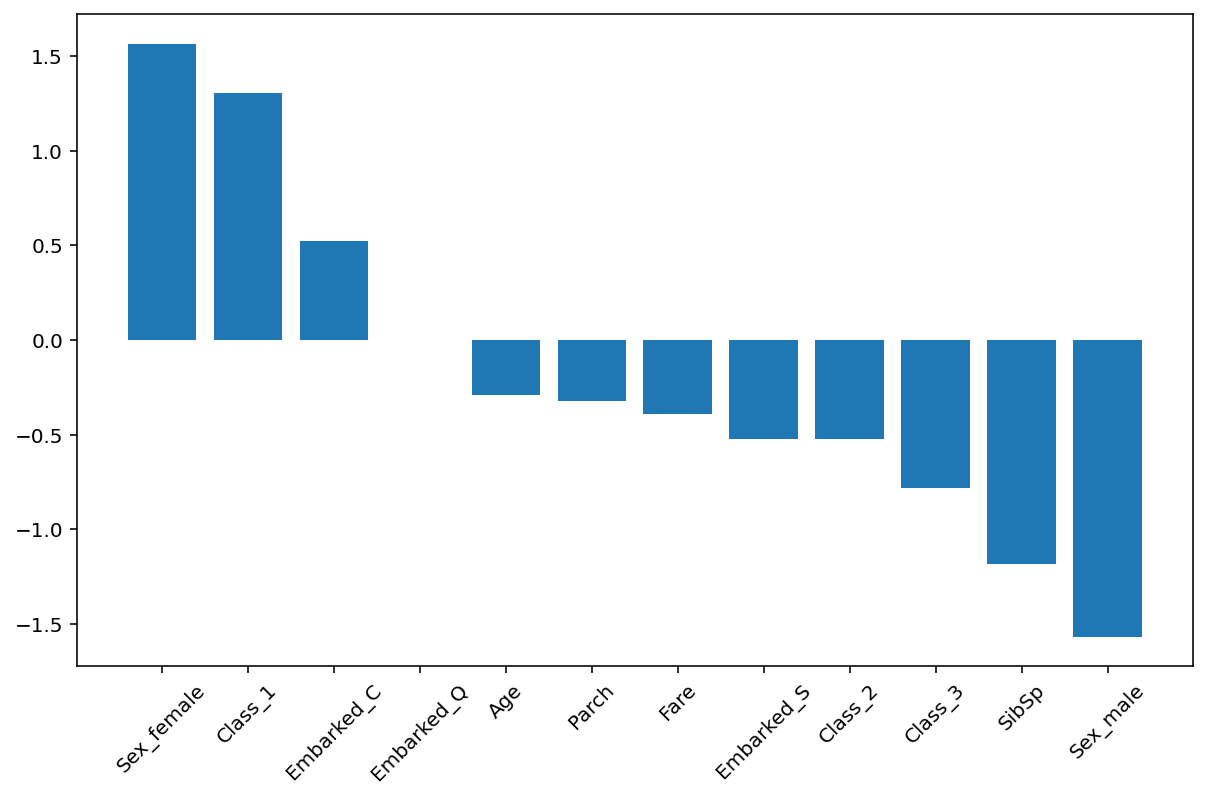

In [55]:
# 가중치 값을 그래프로 보기
plt.figure(figsize=(10,6))
plt.bar(result.feature,result.weight)
plt.xticks(rotation=45)